<a href="https://colab.research.google.com/github/Han-y/AI-model-parctice/blob/main/DANDI000727_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install dandi

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.1/354.1 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.7/336.7 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 115.5 MB/s eta 0:00:00
   ━━━━━

In [3]:
from dandi.dandiapi import DandiAPIClient

In [4]:
!pip install -U pynwb

In [5]:
from dandi.dandiapi import DandiAPIClient

In [6]:
client = DandiAPIClient.for_dandi_instance("dandi")

dandiset_id = "000727"
dandiset = client.get_dandiset(dandiset_id)
asset_list = [asset for asset in dandiset.get_assets() if "nwb" in asset.path]
# The paths are:
[asset.path for asset in asset_list]

['sub-fly-098/sub-fly-098_ses-20200627130208_behavior+image+ophys.nwb',
 'sub-fly-097/sub-fly-097_ses-20200627113329_behavior+image+ophys.nwb',
 'sub-fly-089/sub-fly-089_ses-20200618081653_behavior+image+ophys.nwb',
 'sub-fly-094/sub-fly-094_ses-20200620122048_behavior+image+ophys.nwb',
 'sub-fly-087/sub-fly-087_ses-20200228161226_behavior+image+ophys.nwb',
 'sub-fly-100/sub-fly-100_ses-20200702083849_behavior+image+ophys.nwb',
 'sub-fly-099/sub-fly-099_ses-20200627142647_behavior+image+ophys.nwb',
 'sub-fly-101/sub-fly-101_ses-20200702100612_behavior+image+ophys.nwb',
 'sub-fly-105/sub-fly-105_ses-20200704142706_behavior+image+ophys.nwb']

In [12]:
from h5py import File
from pynwb import NWBHDF5IO
import remfile

In [18]:
asset = asset_list[0]
# Here we build the url to download the file
url = f"https://api.dandiarchive.org/api/dandisets/{asset.dandiset_id}/versions/{asset.version_id}/assets/{asset.identifier}/download"

# We stream the file using remfile and open it with h5py and pynwb
file = remfile.File(url)
h5_file = File(file,"r")

io = NWBHDF5IO(file=h5_file)
nwbfile = io.read()
nwbfile

Data type,uint16
Shape,"(100, 1024, 512, 241)"
Array size,23.54 GiB
Chunk shape,"(9, 1024, 512, 1)"
Compression,gzip
Compression opts,4
Compression ratio,1.3350908769761083
Data type,int64
Shape,"(3,)"
Array size,24.00 bytes
Chunk shape,None


In [20]:
two_photon_series_anatomical_green = nwbfile.acquisition['TwoPhotonSeriesAnatomicalGreen']
two_photon_series_anatomical_green

Data type,uint16
Shape,"(100, 1024, 512, 241)"
Array size,23.54 GiB
Chunk shape,"(9, 1024, 512, 1)"
Compression,gzip
Compression opts,4
Compression ratio,1.3350908769761083
Data type,int64
Shape,"(3,)"
Array size,24.00 bytes
Chunk shape,None


In [22]:
two_photon_series_anatomical_green.data.shape

(100, 1024, 512, 241)

In [27]:
#Let's visualize the average value of one of the planes
plane_index = 100

mean_plane = two_photon_series_anatomical_green.data[...,plane_index].mean(axis=0)
# Note: taking the mean across the axis=0 is the time average
mean_plane.shape


(1024, 512)

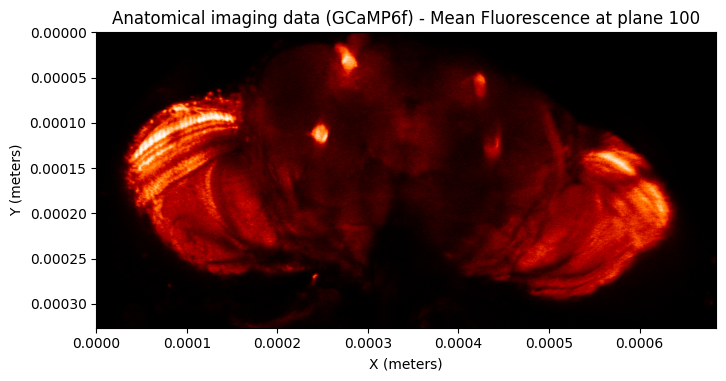

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (8,6))

# The sizes of the image are stored in the imaging_plane of the TwoPhotonSeriesAnatomicalGreen
imaging_plane = two_photon_series_anatomical_green.imaging_plane
grid_spacing_data = imaging_plane.grid_spacing[:]

height, width = mean_plane.shape
x,y = grid_spacing_data[:2]
extent = [0, height *y, width *x,0]


img = ax.imshow(mean_plane.T, cmap = 'gist_heat', extent=extent)

two_photon_series_description = two_photon_series_anatomical_green.description
title = f'{two_photon_series_description} - Mean Fluorescence at plane {plane_index}'
ax.set_title(title)

unit = imaging_plane.origin_coords_unit
ax.set_xlabel(f'X ({unit})')
ax.set_ylabel(f'Y ({unit})')

plt.show()

In [35]:
fictrac_container = nwbfile.processing['behavior']['FicTrac']
fictrac_container

Data type,float64
Shape,"(90000, 1)"
Array size,703.12 KiB
Chunk shape,"(1407, 1)"
Compression,gzip
Compression opts,4
Compression ratio,1.0779282219573978
Data type,float64
Shape,"(90000, 2)"
Array size,1.37 MiB
Chunk shape,"(2813, 1)"
